<a href="https://colab.research.google.com/github/ManelSoengas/tutorials/blob/main/Predicci%C3%B3_de_les_notes_d'un_estudiant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<font color="#brown"> Predicció de les notes d'un estudiant. </font>**

---
Tot i ser un cas fictici es posa en relleu la potencialitat del Machine Learning per predir en base a les relacions i cerca de patrons entre les dades.

A través d'aquest exemple es poden treballar aspectes com ara:

1. Anàlisi de Dades i visualització.
1. Importància de la qualitat de les dades. Biaix.
1. Extracció de patrons i conclusió a partir dels resultats.
1. Ètica i privacitat en l'ús de dades educatives.
1. Exemple amb un models predictius.

**Conjunt de dades utilitzat:**

Descripció del conjunt de dades i [descàrrega](https://archive.ics.uci.edu/dataset/320/student+performance).

# **Introducció**

---



Els centres educatius tenen un paper clau en l’acompanyament i l’èxit escolar de l’alumnat. Tot i això, sovint és difícil detectar a temps aquells estudiants que necessiten més suport per progressar adequadament. L’experiència docent i el seguiment continu són fonamentals, però les dades que es generen al dia a dia del centre poden esdevenir una eina molt valuosa si s’aprofiten de manera estratègica.

Amb tècniques d’aprenentatge automàtic (machine learning), és possible analitzar aquestes dades per identificar patrons de rendiment i predir possibles dificultats. Això permet anticipar situacions de risc i oferir un suport més personalitzat, especialment en etapes sensibles com l’ESO o el Batxillerat. Per exemple, a través de models de regressió, podem predir quines notes pot obtenir l’alumnat i intervenir preventivament abans que es consolidi el fracàs escolar.

Aquest tipus d’enfocament no només afavoreix la personalització de l’aprenentatge, sinó que també obre la porta a treballar competències digitals i d’anàlisi de dades tant amb el professorat com amb l’alumnat. En aquest sentit, la predicció de qualificacions es pot convertir en un projecte educatiu transversal, on es combinin la programació, la reflexió ètica sobre les dades i l’aprenentatge significatiu.


**<font color="Blue"> Primer pas.</font>**

---
1. Càrrega de les llibreries necessàries.
2. Càrrega del Data Set i visualització del contingut.



In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle

data = pd.read_csv("/content/student-mat.csv" , sep=";")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


El conjunt de dades que s'utilitza per a la predicció de notes dels estudiants es basa en el rendiment acadèmic d’alumnes d’escoles portugueses. En aquest conjunt, G1 fa referència a les notes del primer trimestre, G2 a les del segon trimestre, i G3 a les notes finals.

A continuació, es prepararen les dades i s'observa com les tècniques d’aprenentatge automàtic poden ajudar a predir els resultats finals de l’alumnat a partir de les seves qualificacions prèvies.

**<font color="Blue"> Segon pas.</font>**

---
Per visualitzar la relació, correlació o influència entre dues o més variables del dataset (en aquest cas, student-mat.csv), es pot fer servir diverses tècniques gràfiques. Visualitzar la correlació entre variables.
A la taula s'observa :

| Variable                              | Correlació    | Interpretació                                                                  |
| ------------------------------------- | ------------- | ------------------------------------------------------------------------------ |
| `failures`                            | **-0.36**     | A més suspesos previs → pitjor rendiment final.                                |
| `age`                                 | -0.16         | Alumnes més grans (repetidors) → rendiment més baix.                           |
| `goout`, `traveltime`, `Dalc`, `Walc` | -0.05 a -0.13 | Sortir, beure o temps de desplaçament s’associen lleugerament a pitjors notes. |




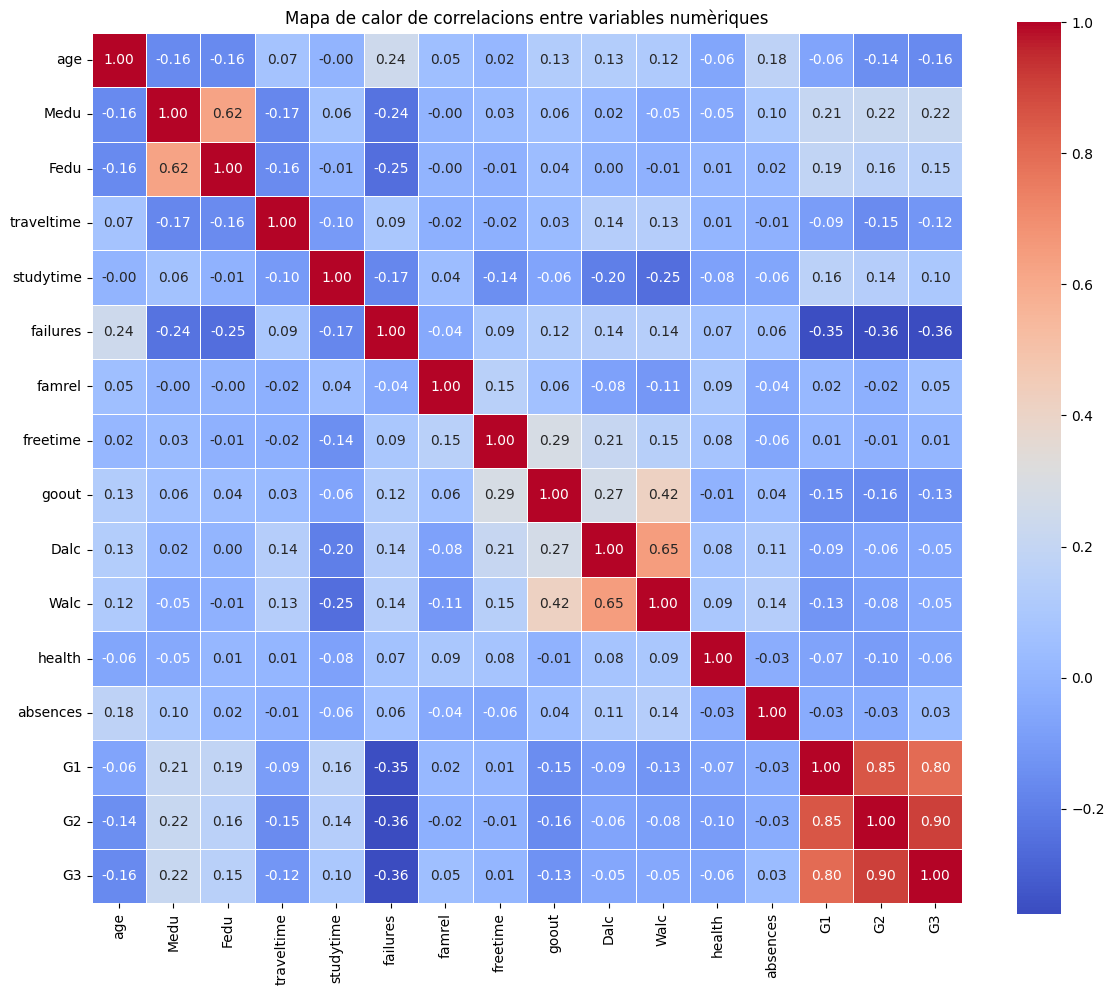

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar el dataset
data = pd.read_csv("/content/student-mat.csv", sep=";")

# Calcular la matriu de correlació només amb variables numèriques
correlation_matrix = data.corr(numeric_only=True)

# Crear un mapa de calor de la matriu de correlació
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Mapa de calor de correlacions entre variables numèriques")
plt.tight_layout()
plt.show()




**<font color="Blue"> Tercer pas.</font>**

---
1. Seleccionem les variables a tractar.
1. Eliminem del conjunt de dades la variable objectiu, G3.
1. La variable G3 és la variable que volem predir.

  * G1: nota del primer trimestre

  * G2: nota del segon trimestre

  * G3: nota final → variable objectiu

  * studytime: hores d’estudi

  * failures: suspensos previs

  * absences: faltes d’assistència

4. **x** : Conté totes les columnes excepte G3 → són les variables explicatives o predictors.
5. **y** : Conté només la columna G3, la variable objectiu.

6. **xtrain, ytrain** : Per entrenar el model (80% de les dades)

7. **xtest, ytest** : Per avaluar el model (20% restant)

8. L’argument test_size=0.2 indica que es reserva un 20% de les dades per fer proves.

In [ ]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
predict = "G3"

x = np.array(data.drop([predict], axis=1))
y = np.array(data[predict])


from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

**<font color="Blue"> Quart pas.</font>**

---
Ara entrenarem un model de regressió lineal per predir les notes finals dels estudiants a partir de les seves dades prèvies. L'objectiu és el que l'algorisme trobi les relacions i patrons entre les dades, i pugui fer prediccions en base a l'aprenentatge fet. La regressió lineal és una de les tècniques més utilitzades en tasques de predicció numèrica, com ara la predicció de notes.

S'nntrena el model amb les dades d’entrenament.

1. **xtrain**: les dades d’entrada (predictors, ex. G1, G2, studytime...)

1. **ytrain**: la variable objectiu (nota final, G3)

El model "aprèn" a fer prediccions trobant la millor combinació de pesos (coeficients) per ajustar-se a les dades.

3. **accuracy = linear_regression.score(xtest, ytest)**
Avalua el rendiment del model utilitzant les dades de test (que no ha vist abans).

El model compara la predicció de G3 amb l’etiqueta real G3 del conjunt ytest, i visualitza la fiabilitat i encert de la predicció a través de la mètrica accuracy.

| Accuracy | Significat                                                   |
| ------------- | ------------------------------------------------------------ |
| 1.0           | Predicció perfecta (cap error)                               |
| 0.8           | El model explica el 80% de la variabilitat dels resultats    |
| 0.0           | El model no millora gens respecte a predir sempre la mitjana |
| < 0           | El model és **pitjor** que predir la mitjana (!)             |



In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(xtrain, ytrain)
accuracy = linear_regression.score(xtest, ytest)
print(accuracy)

0.8167973311327379


El model de regressió lineal ha obtingut una precisió d’aproximadament un 82%, un resultat positiu per a aquest tipus de tasca. A continuació, s'analitzen les prediccions fetes pel model de predicció.



**<font color="Blue"> Cinquè pas.</font>**

---
Mostra cada predicció individual comparada amb el valor real.

El gràfic permet veure patrons, com:

1. El model sempre prediu per sobre o per sota?

1. Té problemes amb valors alts o baixos?

1. Hi ha prediccions molt desviades (outliers)?



In [ ]:
predictions = linear_regression.predict(xtest)

for i in range(len(predictions)):
    print("Predicció:", predictions[i])
    print("Dades d’entrada:", xtest[i])
    print("Nota real:", ytest[i])
    print("---")


Predicció: 11.866696967805051
Dades d’entrada: [15 12  3  0  0]
Nota real: 14
---
Predicció: 9.76114632025236
Dades d’entrada: [10 10  2  1 14]
Nota real: 9
---
Predicció: 7.022768161718764
Dades d’entrada: [ 6  8  1  3 16]
Nota real: 8
---
Predicció: 6.086749617220503
Dades d’entrada: [8 7 2 0 0]
Nota real: 8
---
Predicció: 15.765496743746583
Dades d’entrada: [16 15  2  0 11]
Nota real: 15
---
Predicció: 15.114160859602388
Dades d’entrada: [15 15  2  0  0]
Nota real: 15
---
Predicció: 9.169056418664901
Dades d’entrada: [11  9  2  0 14]
Nota real: 9
---
Predicció: 11.49246830898809
Dades d’entrada: [12 12  3  0  2]
Nota real: 11
---
Predicció: 7.981454078168108
Dades d’entrada: [9 9 2 1 0]
Nota real: 0
---
Predicció: 9.132346190339407
Dades d’entrada: [ 9 10  3  0  4]
Nota real: 10
---
Predicció: -1.287335108962421
Dades d’entrada: [7 0 3 0 0]
Nota real: 0
---
Predicció: 18.67129258084401
Dades d’entrada: [17 18  1  0  0]
Nota real: 18
---
Predicció: 12.083335779039809
Dades d’entrada: